In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick

# Study data files
all_unemp_path = "Clean Data/all_unemp_clean.csv"
unemp_types_path = "Clean Data/Finalone.csv"

# Read the mouse data and the study results
all_unemp_df = pd.read_csv(all_unemp_path)
unemp_types_df = pd.read_csv(unemp_types_path)

# Combine the data into a single dataset
project1_table_raw = pd.merge(all_unemp_df, unemp_types_df, how="left")

# Display the data table for preview
project1_table_raw

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,Jan,2001,4.2,3.6,3.6,3.6,8.2,0.0,5.8,6.7,3.8,3.0,1.6
1,Feb,2001,4.2,3.7,3.7,3.7,7.7,0.0,6.1,7.5,3.7,2.8,1.6
2,Mar,2001,4.3,3.8,3.6,3.7,8.3,0.0,6.2,6.8,3.8,2.7,2.0
3,Apr,2001,4.4,3.9,3.7,3.9,8.0,0.0,6.4,6.8,3.7,2.9,2.1
4,May,2001,4.3,3.9,3.8,3.8,7.9,0.0,6.3,6.6,3.9,3.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,May,2021,5.8,5.9,5.4,5.1,9.1,5.5,7.3,9.1,6.8,5.9,3.2
245,Jun,2021,5.9,5.9,5.5,5.2,9.2,5.8,7.4,10.2,7.0,5.8,3.5
246,Jul,2021,5.4,5.4,5.0,4.8,8.2,5.3,6.6,9.5,6.3,5.0,3.1
247,Aug,2021,5.2,5.1,4.8,4.5,8.8,4.6,6.4,7.8,6.0,5.1,2.8


In [3]:
# Remove Month column and find average
project1_table_raw_1 = project1_table_raw.drop(['Month'], axis=1)
project1_table_raw_1.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.2,3.6,3.6,3.6,8.2,0.0,5.8,6.7,3.8,3.0,1.6
1,2001,4.2,3.7,3.7,3.7,7.7,0.0,6.1,7.5,3.7,2.8,1.6
2,2001,4.3,3.8,3.6,3.7,8.3,0.0,6.2,6.8,3.8,2.7,2.0
3,2001,4.4,3.9,3.7,3.9,8.0,0.0,6.4,6.8,3.7,2.9,2.1
4,2001,4.3,3.9,3.8,3.8,7.9,0.0,6.3,6.6,3.9,3.0,2.1


In [4]:
# Display the data table for preview
project1_table_year = project1_table_raw_1.groupby(['Year'],as_index=False).mean()
project1_table_year.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.741667,4.216667,4.125000,4.166667,8.650000,0.000000,6.575000,7.241667,4.183333,3.300000,2.258333
1,2002,5.783333,5.300000,5.058333,5.100000,10.241667,0.000000,7.558333,8.433333,5.258333,4.533333,2.908333
2,2003,5.991667,5.650000,5.116667,5.250000,10.783333,5.983333,7.658333,8.791667,5.450000,4.791667,3.075000
3,2004,5.541667,5.041667,4.841667,4.800000,10.375000,4.416667,6.950000,8.508333,4.983333,4.233333,2.716667
4,2005,5.083333,4.416667,4.583333,4.366667,9.983333,3.975000,6.008333,7.625000,4.708333,3.866667,2.308333


In [5]:
# Find Average of each year
pd.options.display.float_format = '{:.2f}'.format
project1_table_year.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.74,4.22,4.12,4.17,8.65,0.00,6.58,7.24,4.18,3.30,2.26
1,2002,5.78,5.30,5.06,5.10,10.24,0.00,7.56,8.43,5.26,4.53,2.91
2,2003,5.99,5.65,5.12,5.25,10.78,5.98,7.66,8.79,5.45,4.79,3.07
3,2004,5.54,5.04,4.84,4.80,10.38,4.42,6.95,8.51,4.98,4.23,2.72
4,2005,5.08,4.42,4.58,4.37,9.98,3.98,6.01,7.62,4.71,3.87,2.31


In [6]:
# project1_table_year.dtypes

In [7]:
project1_table_year['Year'] = pd.to_datetime(project1_table_year['Year'], format='%Y')

In [8]:
project1_table_year.dtypes

Year                                      datetime64[ns]
All Unemployment                                 float64
Men (20+)                                        float64
Women (20+)                                      float64
White                                            float64
Black or African American                        float64
Asian                                            float64
Hispanic or Latino                               float64
Less than a High School Diploma (25+)            float64
High School Graduates No College (25+)           float64
Some College or Associate Degree (25+)           float64
Bachelor's Degree and Higher (25+)               float64
dtype: object

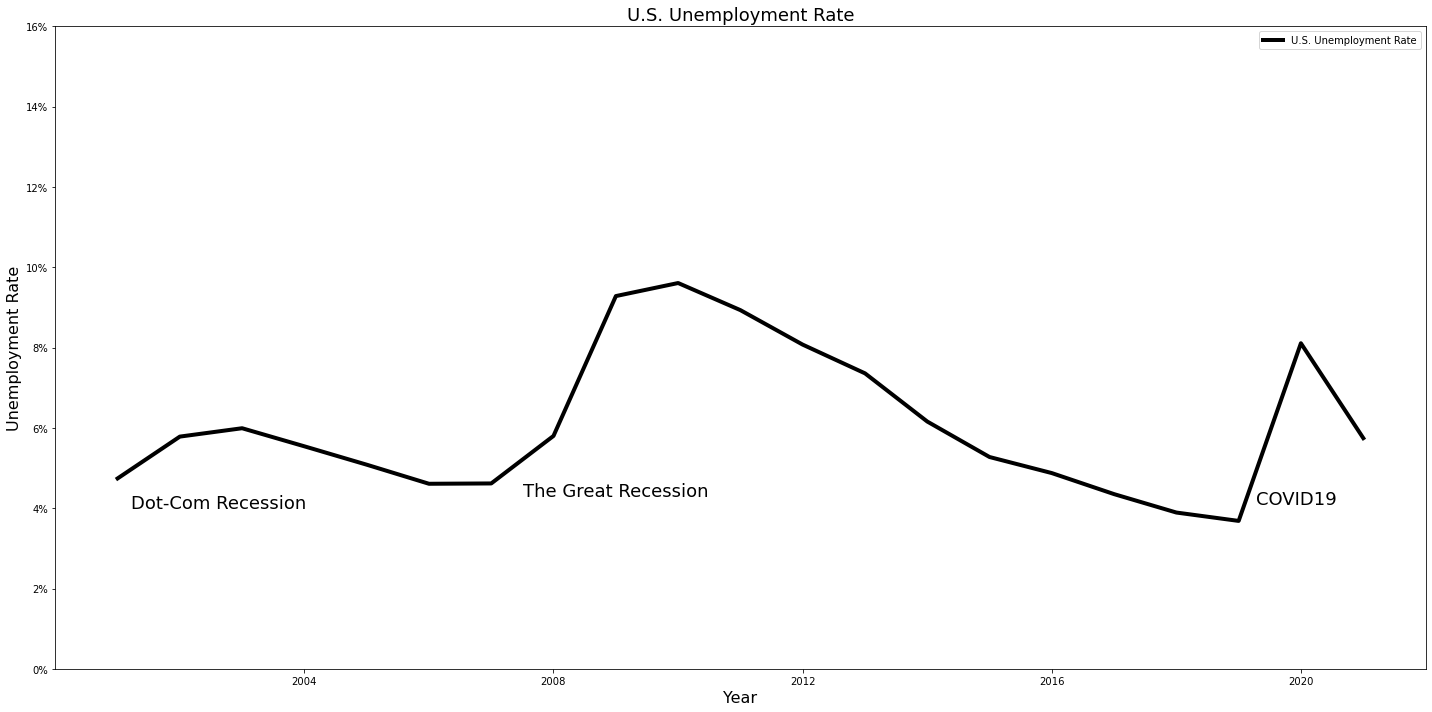

In [9]:
# Generate a line plot of All Unemployment vs. years
# line_plot_df = project1_table_year.loc[project1_table_year["All Unemployment"]]
# project1_table_year['Year'] = pd.to_datetime(project1_table_year['Year'], format='%Y')
# Collect the annual unemployment rates
plt.figure(figsize=(20,10))
x = project1_table_year['Year']
y = project1_table_year['All Unemployment']
line, = plt.plot(x, y, color="black", label="U.S. Unemployment Rate",linewidth=4)
plt.title('U.S. Unemployment Rate',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)
plt.legend(handles=[line],loc="best",fontsize=10)
plt.text(18000,4.1,"COVID19",fontsize= 18)
plt.text(11400,4,"Dot-Com Recession",fontsize= 18)
plt.text(13700,4.3,"The Great Recession",fontsize= 18)
plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

# plt.show()

plt.savefig("Images/US Unemployment Rate")



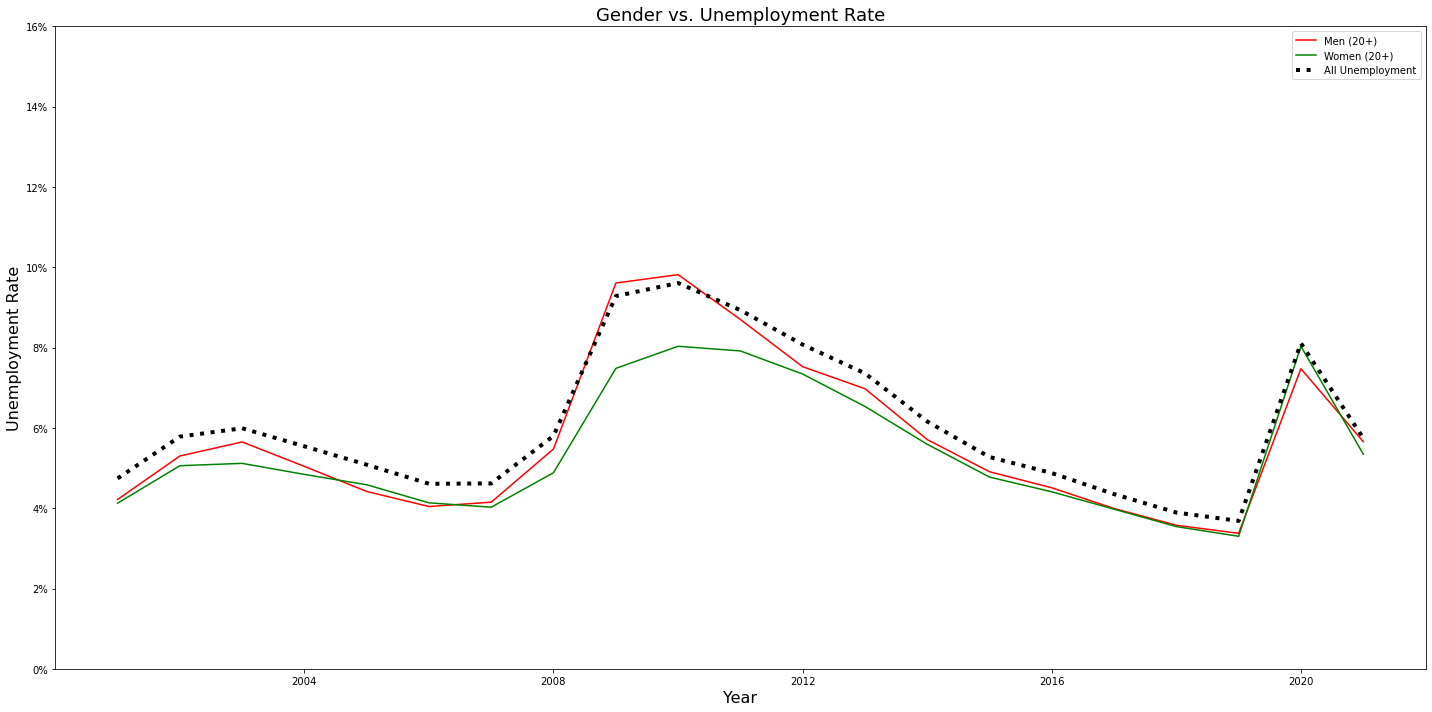

In [10]:

plt.figure(figsize=(20,10))
plt.plot( 'Year','Men (20+)', data=project1_table_year, color='red')
plt.plot( 'Year','Women (20+)', data=project1_table_year, color='green')
plt.plot('Year','All Unemployment',data=project1_table_year,color='black',linewidth=4,linestyle='dotted')
plt.legend()
plt.title("Gender vs. Unemployment Rate",fontsize=18)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Unemployment Rate",fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Gender_vs_Unemployment_Rate")



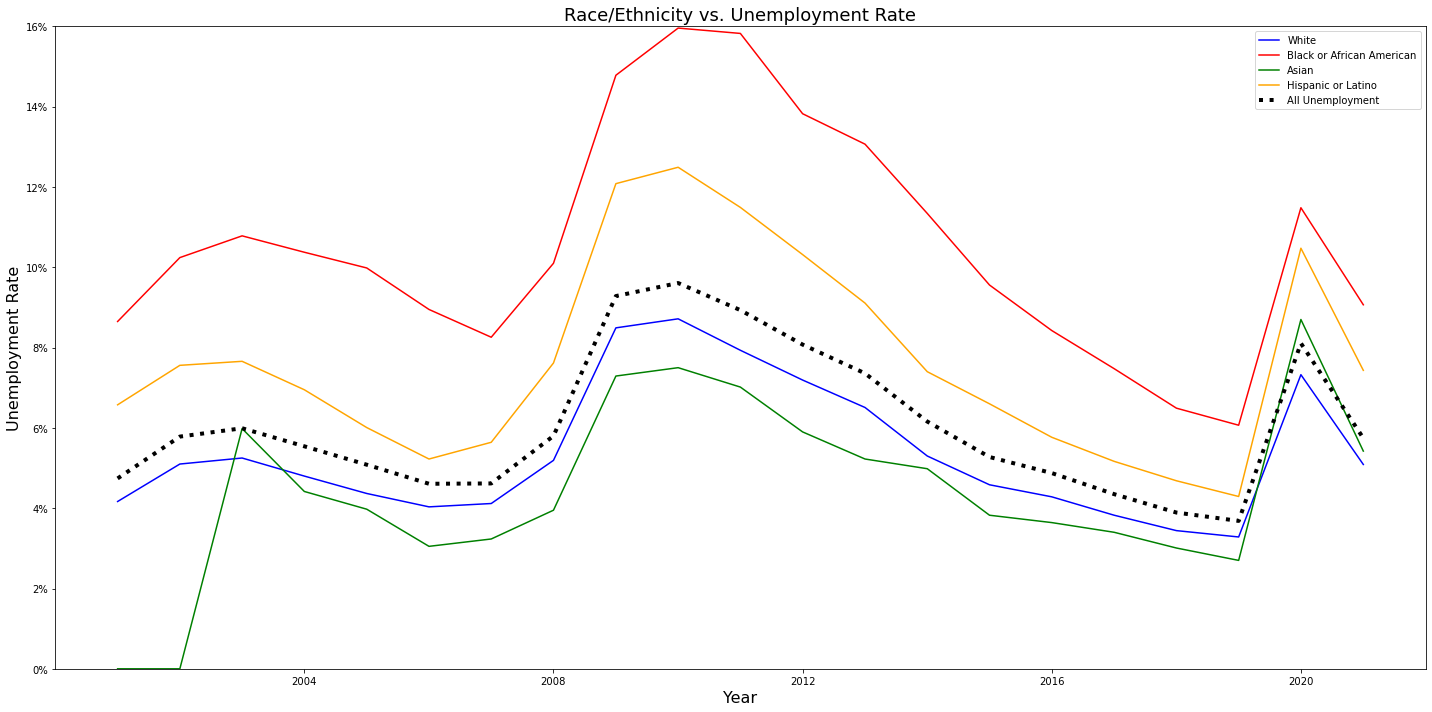

In [11]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'White', data=project1_table_year, color='blue')
plt.plot( 'Year', 'Black or African American', data=project1_table_year, color='red')
plt.plot( 'Year', 'Asian', data=project1_table_year, color='green')
plt.plot( 'Year', 'Hispanic or Latino', data=project1_table_year, color='orange')
plt.plot('Year','All Unemployment',data=project1_table_year,color='black',linewidth=4,linestyle='dotted')
plt.legend(loc='best')
plt.title("Race/Ethnicity vs. Unemployment Rate",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Race vs Unemployment Rate")

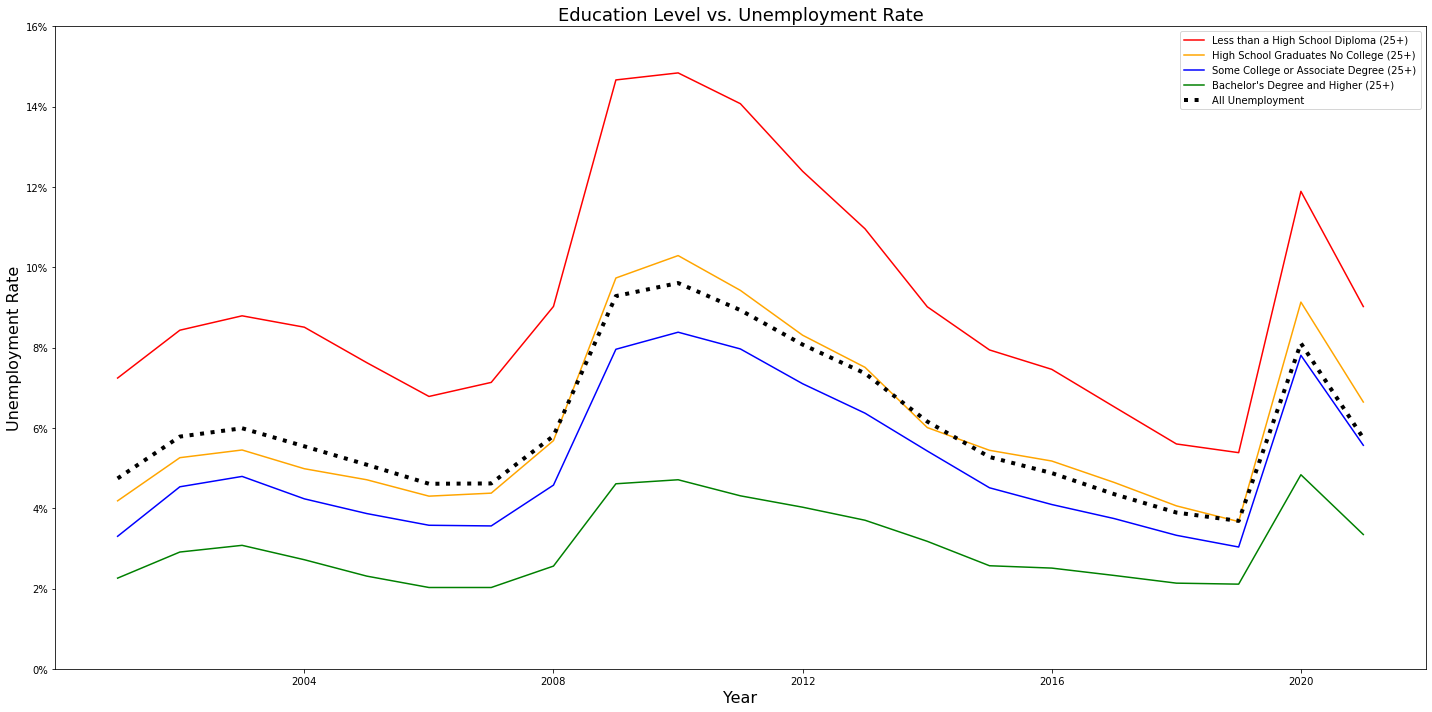

In [12]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Less than a High School Diploma (25+)', data=project1_table_year, color='red')
plt.plot( 'Year', 'High School Graduates No College (25+)', data=project1_table_year, color='orange')
plt.plot( 'Year', 'Some College or Associate Degree (25+)', data=project1_table_year, color='blue')
plt.plot( 'Year', "Bachelor's Degree and Higher (25+)", data=project1_table_year, color='green')
plt.plot('Year','All Unemployment',data=project1_table_year,color='black',linewidth=4,linestyle='dotted')
plt.legend(loc='best')
plt.title("Education Level vs. Unemployment Rate",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Education vs Unemployment Rate")

In [13]:
# Statistical Analysis
# create mean of table summing up all years from project1_table_year
# stat_table = project1_table_year["All Unemployment"].mean()
stat_table = project1_table_year.mean()
stat_table


All Unemployment                          6.07
Men (20+)                                 5.72
Women (20+)                               5.38
White                                     5.38
Black or African American                10.51
Asian                                     4.44
Hispanic or Latino                        7.64
Less than a High School Diploma (25+)     9.21
High School Graduates No College (25+)    6.14
Some College or Associate Degree (25+)    5.13
Bachelor's Degree and Higher (25+)        3.06
dtype: float64

In [14]:
# Chi Square test for Education
pd.options.display.float_format = '{:.2f}'.format

# create df of expected and observed
#create list of avgs for all variablesa
observed_ed = pd.Series([project1_table_year["Less than a High School Diploma (25+)"].mean(),
                         project1_table_year["High School Graduates No College (25+)"].mean(),
                         project1_table_year["Some College or Associate Degree (25+)"].mean(),
                         project1_table_year["Bachelor's Degree and Higher (25+)"].mean()],
                         index =["Less than a High School Diploma (25+)", "High School Graduates No College (25+)",
                                 "Some College or Associate Degree (25+)", "Bachelor's Degree and Higher (25+)"])


observed_ed_df = pd.DataFrame([observed_ed]).T

# put variables in expected
observed_ed_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_ed_df.columns = ["observed","expected"]

print(observed_ed_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_ed_df['observed'], observed_ed_df['expected'])

                                        observed  expected
Less than a High School Diploma (25+)       9.21      6.07
High School Graduates No College (25+)      6.14      6.07
Some College or Associate Degree (25+)      5.13      6.07
Bachelor's Degree and Higher (25+)          3.06      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=3.260273023780017, pvalue=0.35321028368664115)

In [15]:
# Chi Square test for Gender
#create list of avgs for all variables
observed_gender = pd.Series([project1_table_year["Women (20+)"].mean(), project1_table_year["Men (20+)"].mean()],
                            index = ["Women (20+)", "Men (20+)"])
#create df
observed_gender_df = pd.DataFrame([observed_gender]).T
observed_gender_df

# put variables in expected

observed_gender_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_gender_df.columns = ["observed","expected"]

print(observed_gender_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 1),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_gender_df['observed'], observed_gender_df['expected'])

             observed  expected
Women (20+)      5.38      6.07
Men (20+)        5.72      6.07
...............................
critical value: 3.84


Power_divergenceResult(statistic=0.09859209569637867, pvalue=0.7535257606880565)

In [16]:
# Chi Square test for Race
# create df of expected and observed
#create list of avgs for all variables
observed_race = pd.Series([project1_table_year["White"].mean(),
                         project1_table_year["Black or African American"].mean(),
                         project1_table_year["Asian"].mean(),
                         project1_table_year["Hispanic or Latino"].mean()],
                         index =["White", "Black or African American",
                                 "Asian", "Hispanic or Latino"])


observed_race_df = pd.DataFrame([observed_race]).T

# put variables in expected
observed_race_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_race_df.columns = ["observed","expected"]

print(observed_race_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_race_df['observed'], observed_race_df['expected'])

                           observed  expected
White                          5.38      6.07
Black or African American     10.51      6.07
Asian                          4.44      6.07
Hispanic or Latino             7.64      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=4.168869455071637, pvalue=0.2437971828085972)

In [17]:
# create df for recessions
# table to ref project1_table_raw
# dot com table
dot_com = project1_table_raw.iloc[2:11, :]
dot_com

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
2,Mar,2001,4.30,3.80,3.60,3.70,8.30,0.00,6.20,6.80,3.80,2.70,2.00
3,Apr,2001,4.40,3.90,3.70,3.90,8.00,0.00,6.40,6.80,3.70,2.90,2.10
4,May,2001,4.30,3.90,3.80,3.80,7.90,0.00,6.30,6.60,3.90,3.00,2.10
5,Jun,2001,4.50,4.00,3.90,4.00,8.30,0.00,6.60,6.90,3.80,3.00,2.20
6,Jul,2001,4.60,4.10,3.90,4.00,8.00,0.00,6.20,6.80,4.10,3.00,2.20
7,Aug,2001,4.90,4.40,4.30,4.30,9.10,0.00,6.50,7.20,4.40,3.30,2.30
8,Sep,2001,5.00,4.30,4.40,4.30,8.90,0.00,6.70,7.70,4.40,3.40,2.50
9,Oct,2001,5.30,4.80,4.70,4.70,9.50,0.00,7.10,7.60,4.70,4.10,2.60
10,Nov,2001,5.50,5.00,4.80,4.90,9.80,0.00,7.30,8.00,5.00,4.20,2.90


In [18]:
# chi square test for dot_com recession on race
observed_race_dc = pd.Series([dot_com["White"].mean(),
                         dot_com["Black or African American"].mean(),
                         dot_com["Hispanic or Latino"].mean()],
                         index =["White", "Black or African American",
                                  "Hispanic or Latino"])


observed_race_dc_df = pd.DataFrame([observed_race_dc]).T

# put variables in expected
observed_race_dc_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_race_dc_df.columns = ["observed","expected"]

print(observed_race_dc_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)

# chi square code
st.chisquare(observed_race_dc_df['observed'], observed_race_dc_df['expected'])

                           observed  expected
White                          4.18      6.07
Black or African American      8.64      6.07
Hispanic or Latino             6.59      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=1.7247853353029368, pvalue=0.4221508063981001)

In [19]:
dot_com_two = project1_table_raw.iloc[1:12, :]
dot_com_two

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
1,Feb,2001,4.20,3.70,3.70,3.70,7.70,0.00,6.10,7.50,3.70,2.80,1.60
2,Mar,2001,4.30,3.80,3.60,3.70,8.30,0.00,6.20,6.80,3.80,2.70,2.00
3,Apr,2001,4.40,3.90,3.70,3.90,8.00,0.00,6.40,6.80,3.70,2.90,2.10
4,May,2001,4.30,3.90,3.80,3.80,7.90,0.00,6.30,6.60,3.90,3.00,2.10
5,Jun,2001,4.50,4.00,3.90,4.00,8.30,0.00,6.60,6.90,3.80,3.00,2.20
6,Jul,2001,4.60,4.10,3.90,4.00,8.00,0.00,6.20,6.80,4.10,3.00,2.20
7,Aug,2001,4.90,4.40,4.30,4.30,9.10,0.00,6.50,7.20,4.40,3.30,2.30
8,Sep,2001,5.00,4.30,4.40,4.30,8.90,0.00,6.70,7.70,4.40,3.40,2.50
9,Oct,2001,5.30,4.80,4.70,4.70,9.50,0.00,7.10,7.60,4.70,4.10,2.60
10,Nov,2001,5.50,5.00,4.80,4.90,9.80,0.00,7.30,8.00,5.00,4.20,2.90


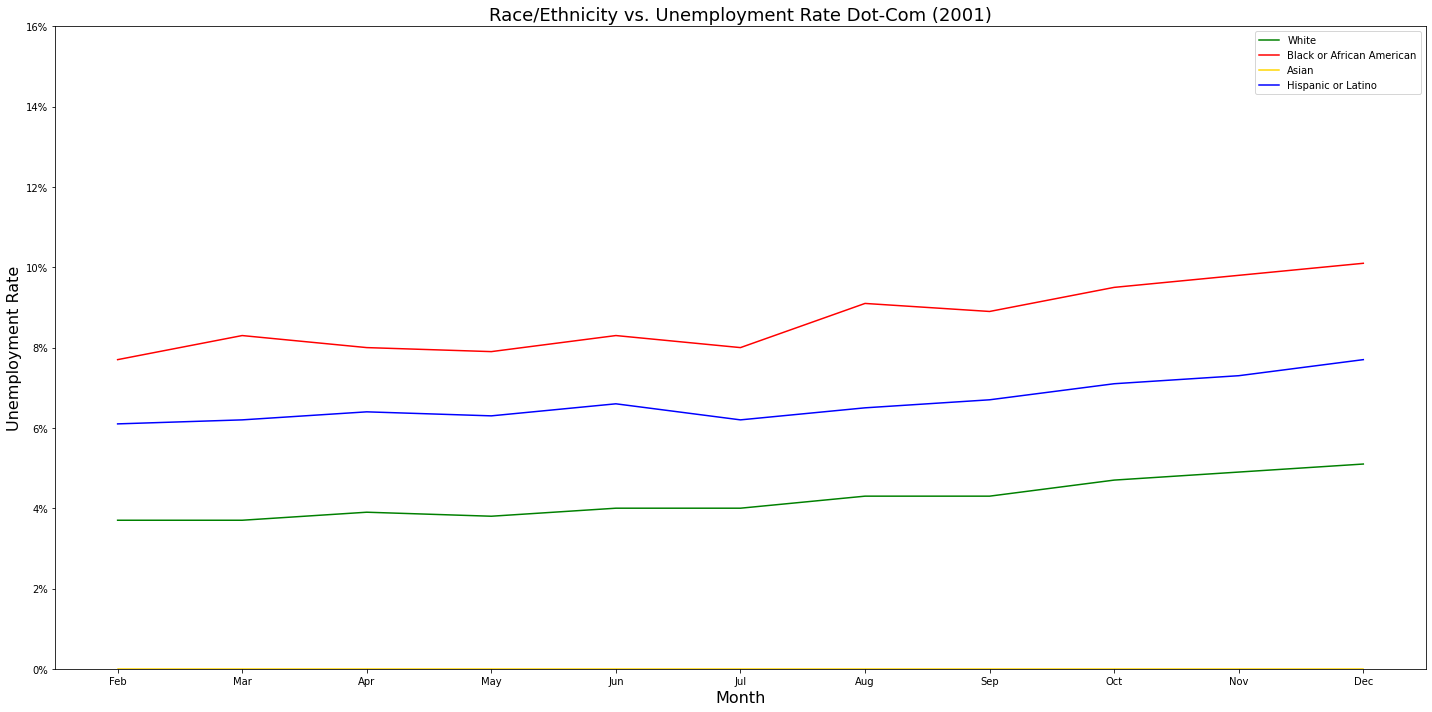

In [20]:
plt.figure(figsize=(20,10))
plt.plot( 'Month', 'White', data=dot_com_two, color='green')
plt.plot( 'Month', 'Black or African American', data=dot_com_two, color='red')
plt.plot( 'Month', 'Asian', data=dot_com_two, color='gold')
plt.plot( 'Month', 'Hispanic or Latino', data=dot_com_two, color='blue')
plt.legend(loc='best')
plt.title("Race/Ethnicity vs. Unemployment Rate Dot-Com (2001)",fontsize=18)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Race vs Unemployment Rate_Dot_Com")

In [21]:
# Chi Square test for Gender dot_com
#create list of avgs for all variables
observed_gender_dc = pd.Series([dot_com["Women (20+)"].mean(), dot_com["Men (20+)"].mean()],
                            index = ["Women (20+)", "Men (20+)"])
#create df
observed_gender_dc_df = pd.DataFrame([observed_gender_dc]).T
observed_gender_dc_df

# put variables in expected

observed_gender_dc_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_gender_dc_df.columns = ["observed","expected"]

print(observed_gender_dc_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 1),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_gender_dc_df['observed'], observed_gender_dc_df['expected'])

             observed  expected
Women (20+)      4.12      6.07
Men (20+)        4.24      6.07
...............................
critical value: 3.84


Power_divergenceResult(statistic=1.1761071645264742, pvalue=0.27814992670336824)

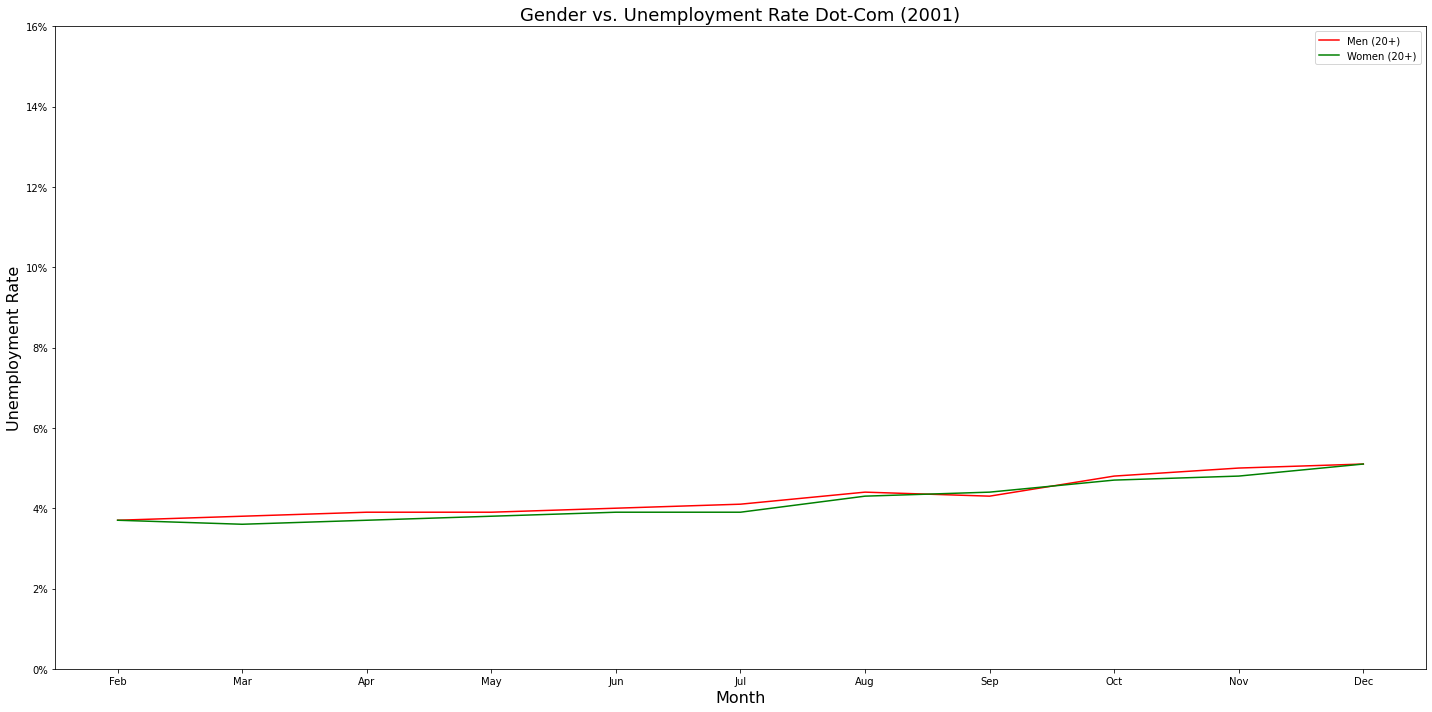

In [22]:

plt.figure(figsize=(20,10))
plt.plot( 'Month','Men (20+)', data=dot_com_two, color='red')
plt.plot( 'Month','Women (20+)', data=dot_com_two, color='green')

plt.legend()
plt.title("Gender vs. Unemployment Rate Dot-Com (2001)",fontsize=18)
plt.xlabel("Month",fontsize=16)
plt.ylabel("Unemployment Rate",fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Gender_vs_Unemployment_Rate_Dot_Com")

In [23]:
# Chi Square test for Education dot com
pd.options.display.float_format = '{:.2f}'.format

# create df of expected and observed
#create list of avgs for all variables
observed_ed_dc = pd.Series([dot_com["Less than a High School Diploma (25+)"].mean(),
                         dot_com["High School Graduates No College (25+)"].mean(),
                         dot_com["Some College or Associate Degree (25+)"].mean(),
                         dot_com["Bachelor's Degree and Higher (25+)"].mean()],
                         index =["Less than a High School Diploma (25+)", "High School Graduates No College (25+)",
                                 "Some College or Associate Degree (25+)", "Bachelor's Degree and Higher (25+)"])


observed_ed_dc_df = pd.DataFrame([observed_ed_dc]).T

# put variables in expected
observed_ed_dc_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_ed_dc_df.columns = ["observed","expected"]

print(observed_ed_dc_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_ed_dc_df['observed'], observed_ed_dc_df['expected'])

                                        observed  expected
Less than a High School Diploma (25+)       7.16      6.07
High School Graduates No College (25+)      4.20      6.07
Some College or Associate Degree (25+)      3.29      6.07
Bachelor's Degree and Higher (25+)          2.32      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=4.361755981196554, pvalue=0.22495780174733299)

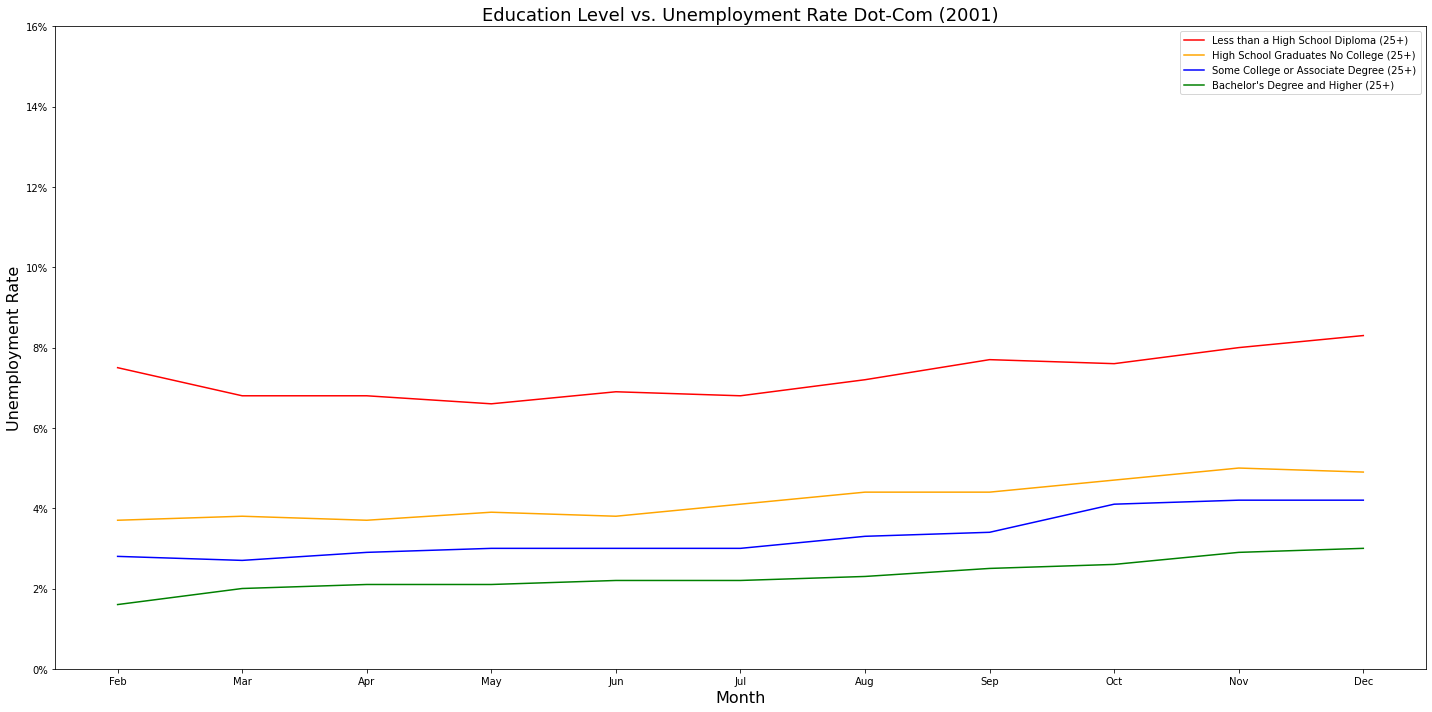

In [24]:
plt.figure(figsize=(20,10))
plt.plot( 'Month', 'Less than a High School Diploma (25+)', data=dot_com_two, color='red')
plt.plot( 'Month', 'High School Graduates No College (25+)', data=dot_com_two, color='orange')
plt.plot( 'Month', 'Some College or Associate Degree (25+)', data=dot_com_two, color='blue')
plt.plot( 'Month', "Bachelor's Degree and Higher (25+)", data=dot_com_two, color='green')

plt.legend(loc='best')
plt.title("Education Level vs. Unemployment Rate Dot-Com (2001)",fontsize=18)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Education vs Unemployment Rate_Dot_Com")

In [25]:
# great recession
great_rec = project1_table_raw.iloc[83:102, :]
great_rec

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
83,Dec,2007,5.00,4.40,4.40,4.40,9.00,3.70,6.30,7.70,4.70,3.80,2.10
84,Jan,2008,5.00,4.50,4.30,4.40,9.10,3.10,6.30,7.70,4.70,3.70,2.10
85,Feb,2008,4.90,4.40,4.20,4.40,8.40,2.90,6.20,7.40,4.70,3.80,2.00
86,Mar,2008,5.10,4.60,4.50,4.50,9.20,3.60,6.90,8.40,5.10,3.90,2.10
87,Apr,2008,5.00,4.60,4.20,4.40,8.60,3.50,7.10,7.70,5.00,4.00,2.10
88,May,2008,5.40,4.90,4.60,4.80,9.60,4.10,6.90,8.10,5.00,4.30,2.20
89,Jun,2008,5.60,5.10,4.70,5.00,9.40,4.20,7.60,8.70,5.10,4.30,2.40
90,Jul,2008,5.80,5.40,4.70,5.20,10.00,3.70,7.50,8.60,5.40,4.60,2.50
91,Aug,2008,6.10,5.70,5.40,5.40,10.60,4.50,8.00,9.70,5.80,4.90,2.80
92,Sep,2008,6.10,6.10,5.00,5.40,11.30,4.00,8.00,9.80,6.20,5.00,2.60


In [26]:
# Chi Square test for Education great recession
pd.options.display.float_format = '{:.2f}'.format

# create df of expected and observed
#create list of avgs for all variables
observed_ed_grec = pd.Series([great_rec["Less than a High School Diploma (25+)"].mean(),
                         great_rec["High School Graduates No College (25+)"].mean(),
                         great_rec["Some College or Associate Degree (25+)"].mean(),
                         great_rec["Bachelor's Degree and Higher (25+)"].mean()],
                         index =["Less than a High School Diploma (25+)", "High School Graduates No College (25+)",
                                 "Some College or Associate Degree (25+)", "Bachelor's Degree and Higher (25+)"])


observed_ed_grec_df = pd.DataFrame([observed_ed_grec]).T

# put variables in expected
observed_ed_grec_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_ed_grec_df.columns = ["observed","expected"]

print(observed_ed_grec_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_ed_grec_df['observed'], observed_ed_grec_df['expected'])

                                        observed  expected
Less than a High School Diploma (25+)      10.59      6.07
High School Graduates No College (25+)      6.74      6.07
Some College or Associate Degree (25+)      5.45      6.07
Bachelor's Degree and Higher (25+)          3.11      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=4.949185228536617, pvalue=0.17555609174983358)

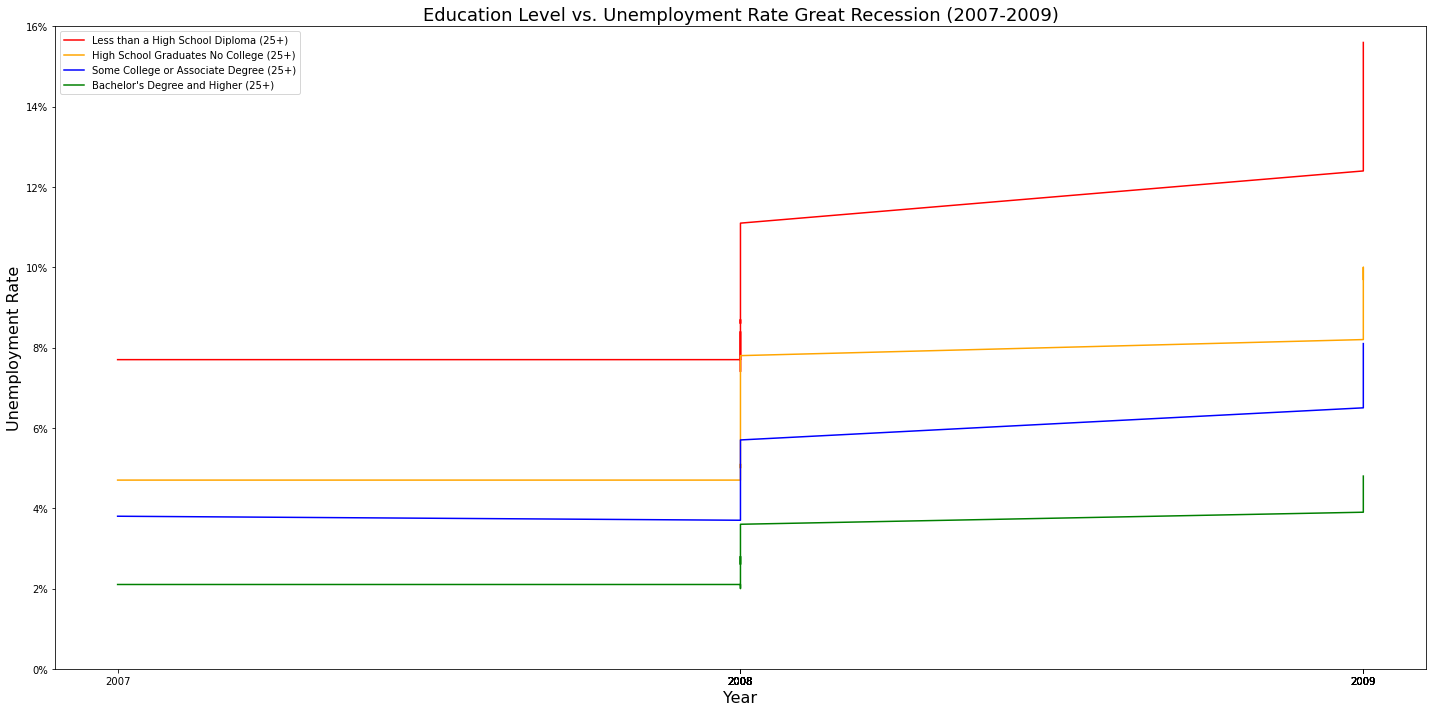

In [27]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Less than a High School Diploma (25+)', data=great_rec, color='red')
plt.plot( 'Year', 'High School Graduates No College (25+)', data=great_rec, color='orange')
plt.plot( 'Year', 'Some College or Associate Degree (25+)', data=great_rec, color='blue')
plt.plot( 'Year', "Bachelor's Degree and Higher (25+)", data=great_rec, color='green')

plt.legend(loc='best')
plt.title("Education Level vs. Unemployment Rate Great Recession (2007-2009)",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)
plt.xticks(great_rec['Year'])
plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Education vs Unemployment Rate_Great_Recession")

In [28]:
# Chi Square test for Gender great recession
#create list of avgs for all variables
observed_gender_grec = pd.Series([great_rec["Women (20+)"].mean(), great_rec["Men (20+)"].mean()],
                            index = ["Women (20+)", "Men (20+)"])
#create df
observed_gender_grec_df = pd.DataFrame([observed_gender_grec]).T
observed_gender_grec_df

# put variables in expected

observed_gender_grec_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_gender_grec_df.columns = ["observed","expected"]

print(observed_gender_grec_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 1),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_gender_grec_df['observed'], observed_gender_grec_df['expected'])

             observed  expected
Women (20+)      5.56      6.07
Men (20+)        6.56      6.07
...............................
critical value: 3.84


Power_divergenceResult(statistic=0.08325788607728363, pvalue=0.7729300283945959)

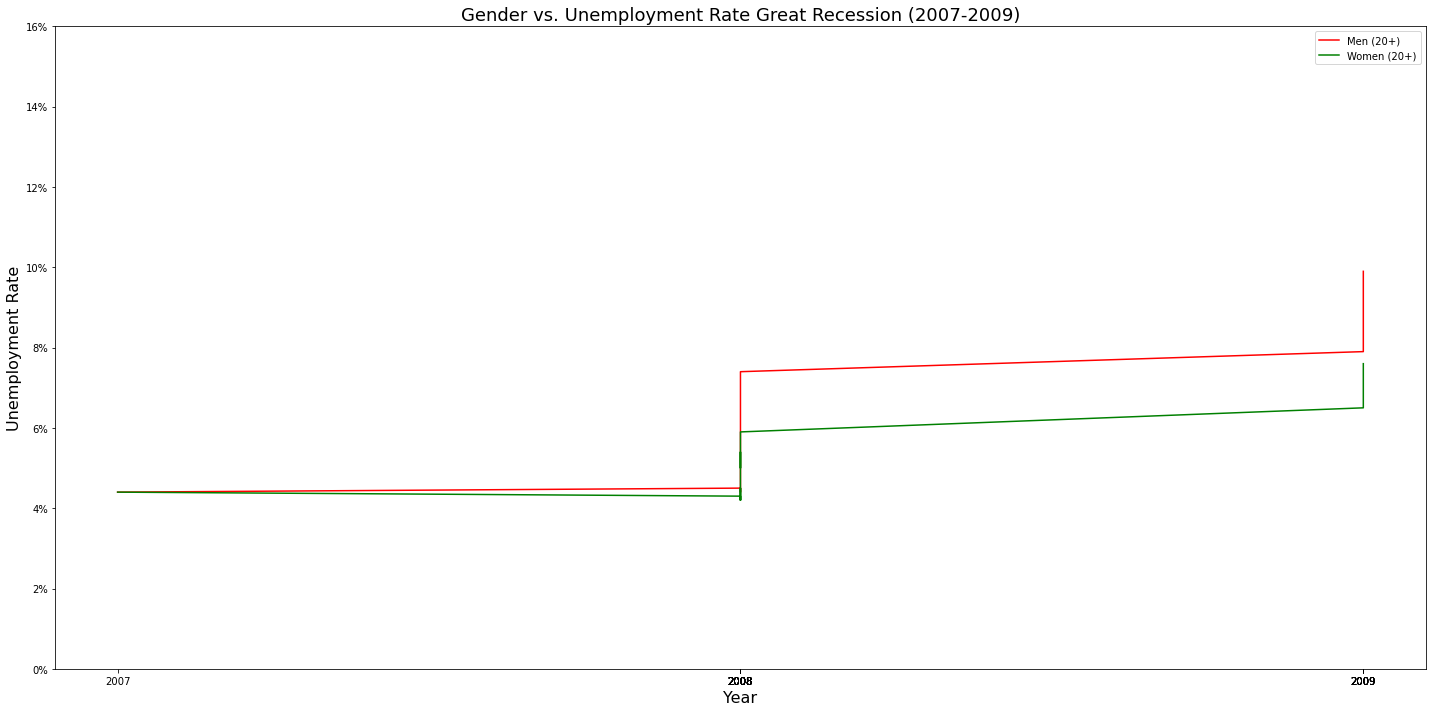

In [29]:

plt.figure(figsize=(20,10))
plt.plot( 'Year','Men (20+)', data=great_rec, color='red')
plt.plot( 'Year','Women (20+)', data=great_rec, color='green')

plt.legend()
plt.title("Gender vs. Unemployment Rate Great Recession (2007-2009)",fontsize=18)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Unemployment Rate",fontsize=16)
plt.xticks(great_rec['Year'])
plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Gender_vs_Unemployment_Rate_Great_Recession")



In [30]:
# chi square test for great recession on race
observed_race_grec = pd.Series([great_rec["White"].mean(),
                         great_rec["Black or African American"].mean(),
                         great_rec["Asian"].mean(),
                         great_rec["Hispanic or Latino"].mean()],
                         index =["White", "Black or African American",
                                 "Asian", "Hispanic or Latino"])


observed_race_grec_df = pd.DataFrame([observed_race_grec]).T

# put variables in expected
observed_race_grec_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_race_grec_df.columns = ["observed","expected"]

print(observed_race_grec_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)

# chi square code
st.chisquare(observed_race_grec_df['observed'], observed_race_grec_df['expected'])

                           observed  expected
White                          6.04      6.07
Black or African American     11.32      6.07
Asian                          4.85      6.07
Hispanic or Latino             8.77      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=5.982381063467089, pvalue=0.11247057818903675)

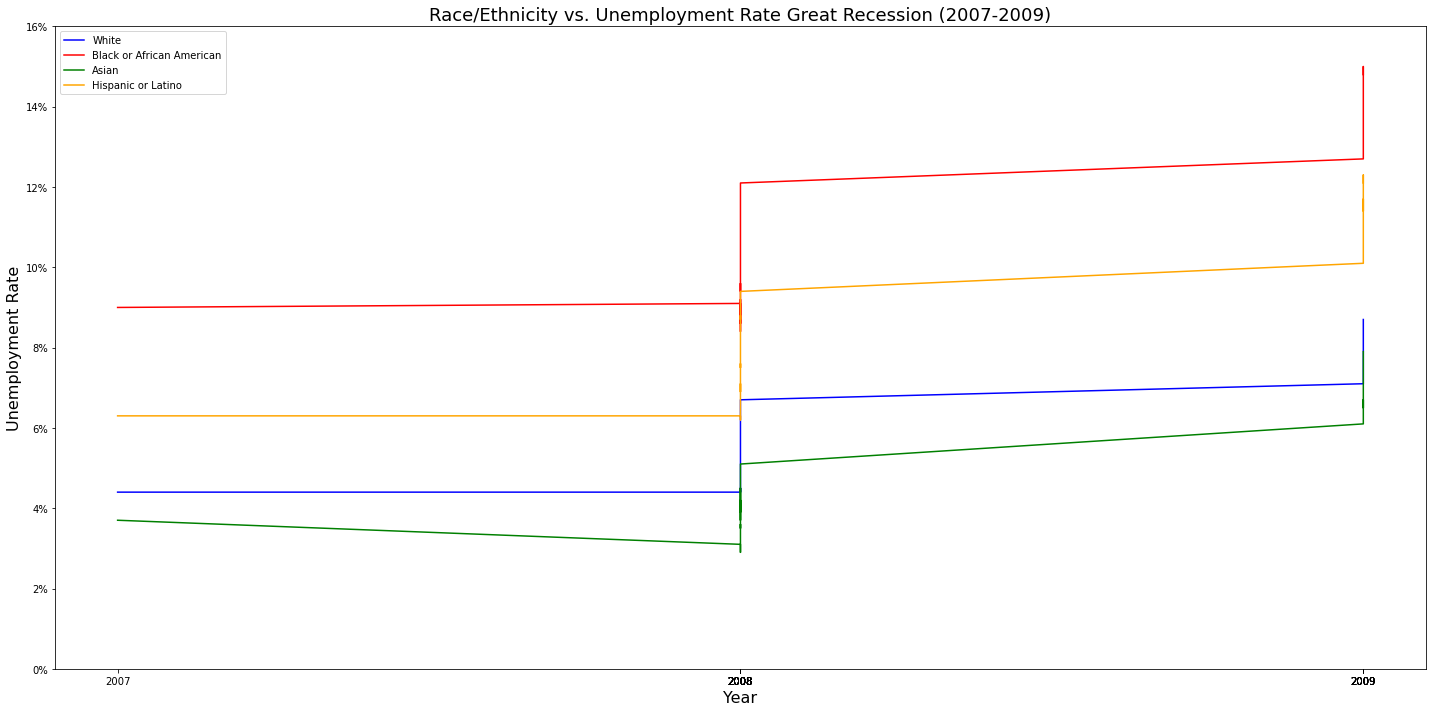

In [31]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'White', data=great_rec, color='blue')
plt.plot( 'Year', 'Black or African American', data=great_rec, color='red')
plt.plot( 'Year', 'Asian', data=great_rec, color='green')
plt.plot( 'Year', 'Hispanic or Latino', data=great_rec, color='orange')

plt.legend(loc='best')
plt.title("Race/Ethnicity vs. Unemployment Rate Great Recession (2007-2009)",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)
plt.xticks(great_rec['Year'])
plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Race_Ethnicity vs Unemployment Rate_Great_Recession")

In [32]:
# covid
covid = project1_table_raw.iloc[229:232, :]
covid

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
229,Feb,2020,3.50,3.20,3.10,3.00,6.00,2.40,4.40,5.80,3.50,3.00,1.90
230,Mar,2020,4.40,4.10,4.00,3.90,6.80,4.10,6.00,6.90,4.30,3.70,2.50
231,Apr,2020,14.80,13.10,15.50,14.10,16.70,14.50,18.90,21.00,17.30,15.00,8.40


In [33]:
# Chi Square test for Education covid
pd.options.display.float_format = '{:.2f}'.format

# create df of expected and observed
#create list of avgs for all variables
observed_ed_cov = pd.Series([covid["Less than a High School Diploma (25+)"].mean(),
                         covid["High School Graduates No College (25+)"].mean(),
                         covid["Some College or Associate Degree (25+)"].mean(),
                         covid["Bachelor's Degree and Higher (25+)"].mean()],
                         index =["Less than a High School Diploma (25+)", "High School Graduates No College (25+)",
                                 "Some College or Associate Degree (25+)", "Bachelor's Degree and Higher (25+)"])


observed_ed_cov_df = pd.DataFrame([observed_ed_cov]).T

# put variables in expected
observed_ed_cov_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_ed_cov_df.columns = ["observed","expected"]

print(observed_ed_cov_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_ed_cov_df['observed'], observed_ed_cov_df['expected'])

                                        observed  expected
Less than a High School Diploma (25+)      11.23      6.07
High School Graduates No College (25+)      8.37      6.07
Some College or Associate Degree (25+)      7.23      6.07
Bachelor's Degree and Higher (25+)          4.27      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=6.013440656460874, pvalue=0.11095813586299941)

In [34]:
covid_two = project1_table_raw.iloc[228:233, :]
covid_two

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
228,Jan,2020,3.50,3.10,3.20,3.00,6.10,3.10,4.30,5.70,3.70,2.70,2.00
229,Feb,2020,3.50,3.20,3.10,3.00,6.00,2.40,4.40,5.80,3.50,3.00,1.90
230,Mar,2020,4.40,4.10,4.00,3.90,6.80,4.10,6.00,6.90,4.30,3.70,2.50
231,Apr,2020,14.80,13.10,15.50,14.10,16.70,14.50,18.90,21.00,17.30,15.00,8.40
232,May,2020,13.30,11.60,13.90,12.30,16.70,14.90,17.60,19.60,15.30,13.20,7.40


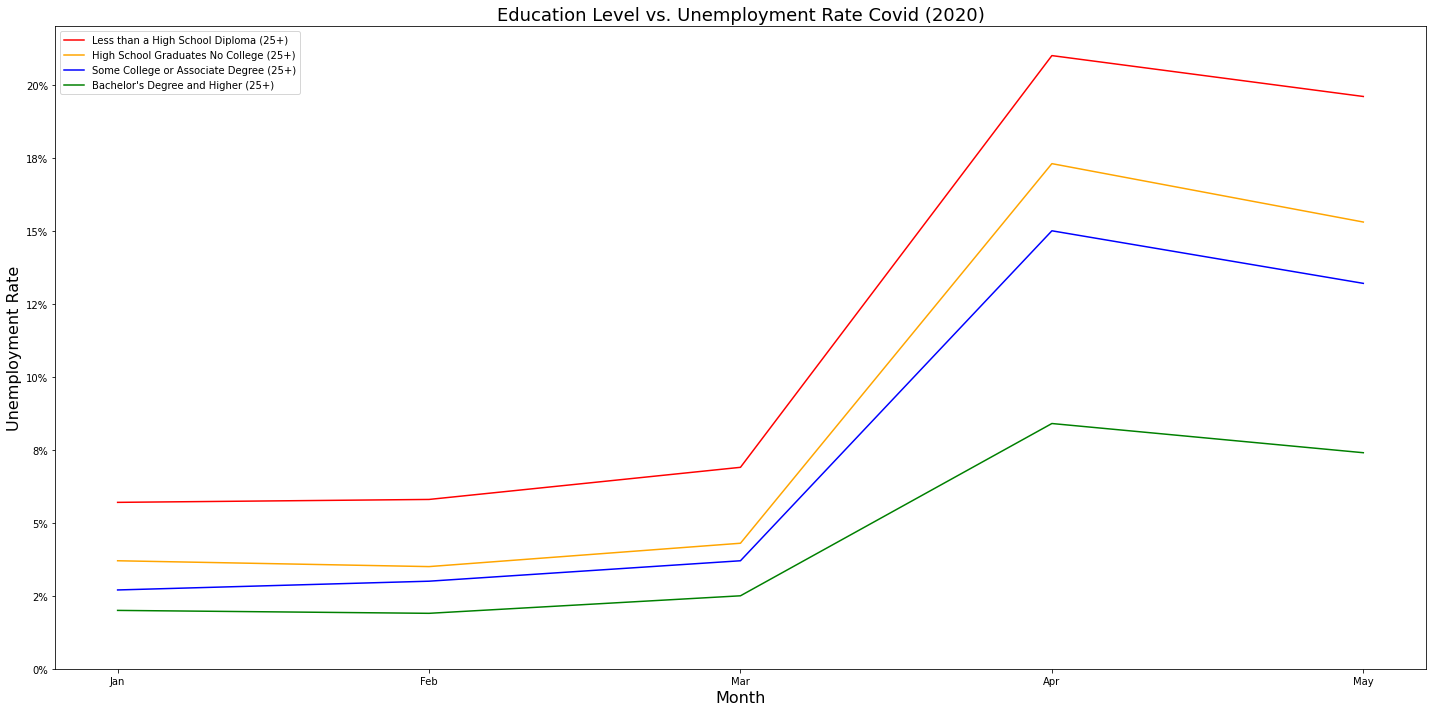

In [35]:
plt.figure(figsize=(20,10))
plt.plot( 'Month', 'Less than a High School Diploma (25+)', data=covid_two, color='red')
plt.plot( 'Month', 'High School Graduates No College (25+)', data=covid_two, color='orange')
plt.plot( 'Month', 'Some College or Associate Degree (25+)', data=covid_two, color='blue')
plt.plot( 'Month', "Bachelor's Degree and Higher (25+)", data=covid_two, color='green')

plt.legend(loc='best')
plt.title("Education Level vs. Unemployment Rate Covid (2020)",fontsize=18)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,22,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Education vs Unemployment Rate_Covid")

In [36]:
# Chi Square test for Gender covid
#create list of avgs for all variables
observed_gender_cov = pd.Series([covid["Women (20+)"].mean(), covid["Men (20+)"].mean()],
                            index = ["Women (20+)", "Men (20+)"])
#create df
observed_gender_cov_df = pd.DataFrame([observed_gender_cov]).T
observed_gender_cov_df

# put variables in expected

observed_gender_cov_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_gender_cov_df.columns = ["observed","expected"]

print(observed_gender_cov_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 1),2)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_gender_cov_df['observed'], observed_gender_cov_df['expected'])

             observed  expected
Women (20+)      7.53      6.07
Men (20+)        6.80      6.07
...............................
critical value: 3.84


Power_divergenceResult(statistic=0.4390123579736689, pvalue=0.5075995336718113)

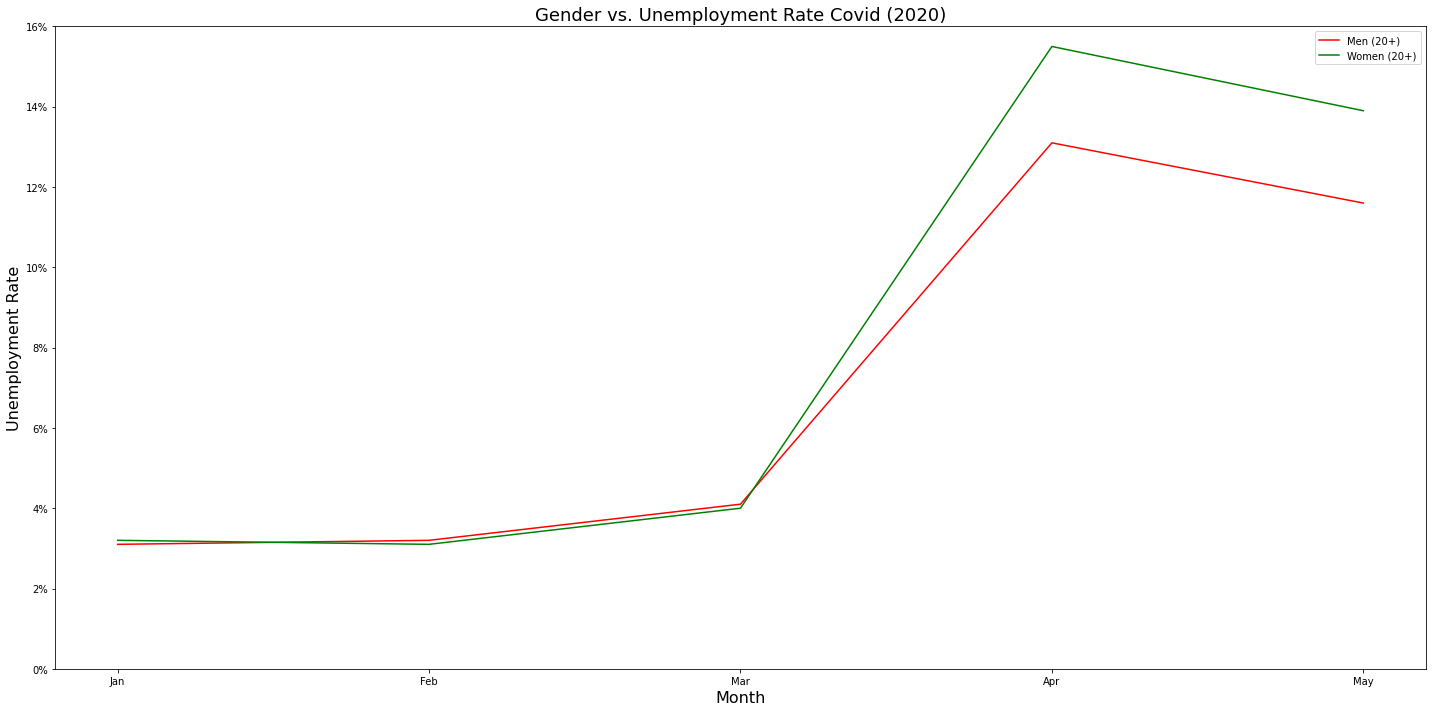

In [37]:

plt.figure(figsize=(20,10))
plt.plot( 'Month','Men (20+)', data=covid_two, color='red')
plt.plot( 'Month','Women (20+)', data=covid_two, color='green')

plt.legend()
plt.title("Gender vs. Unemployment Rate Covid (2020)",fontsize=18)
plt.xlabel("Month",fontsize=16)
plt.ylabel("Unemployment Rate",fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Gender_vs_Unemployment_Rate_Covid")

In [38]:
# chi square test for covid recession on race
observed_race_cov = pd.Series([covid["White"].mean(),
                         covid["Black or African American"].mean(),
                         covid["Asian"].mean(),
                         covid["Hispanic or Latino"].mean()],
                         index =["White", "Black or African American",
                                 "Asian", "Hispanic or Latino"])


observed_race_cov_df = pd.DataFrame([observed_race_cov]).T

# put variables in expected
observed_race_cov_df[1]= project1_table_year["All Unemployment"].mean()

#name columns
observed_race_cov_df.columns = ["observed","expected"]

print(observed_race_cov_df)
print('...............................')
# critical value
critical_value = round(st.chi2.ppf(q = 0.95, df = 3),2)
print('critical value:', critical_value)

# chi square code
st.chisquare(observed_race_cov_df['observed'], observed_race_cov_df['expected'])

                           observed  expected
White                          7.00      6.07
Black or African American      9.83      6.07
Asian                          7.00      6.07
Hispanic or Latino             9.77      6.07
...............................
critical value: 7.81


Power_divergenceResult(statistic=4.86191573488541, pvalue=0.18219212599945386)

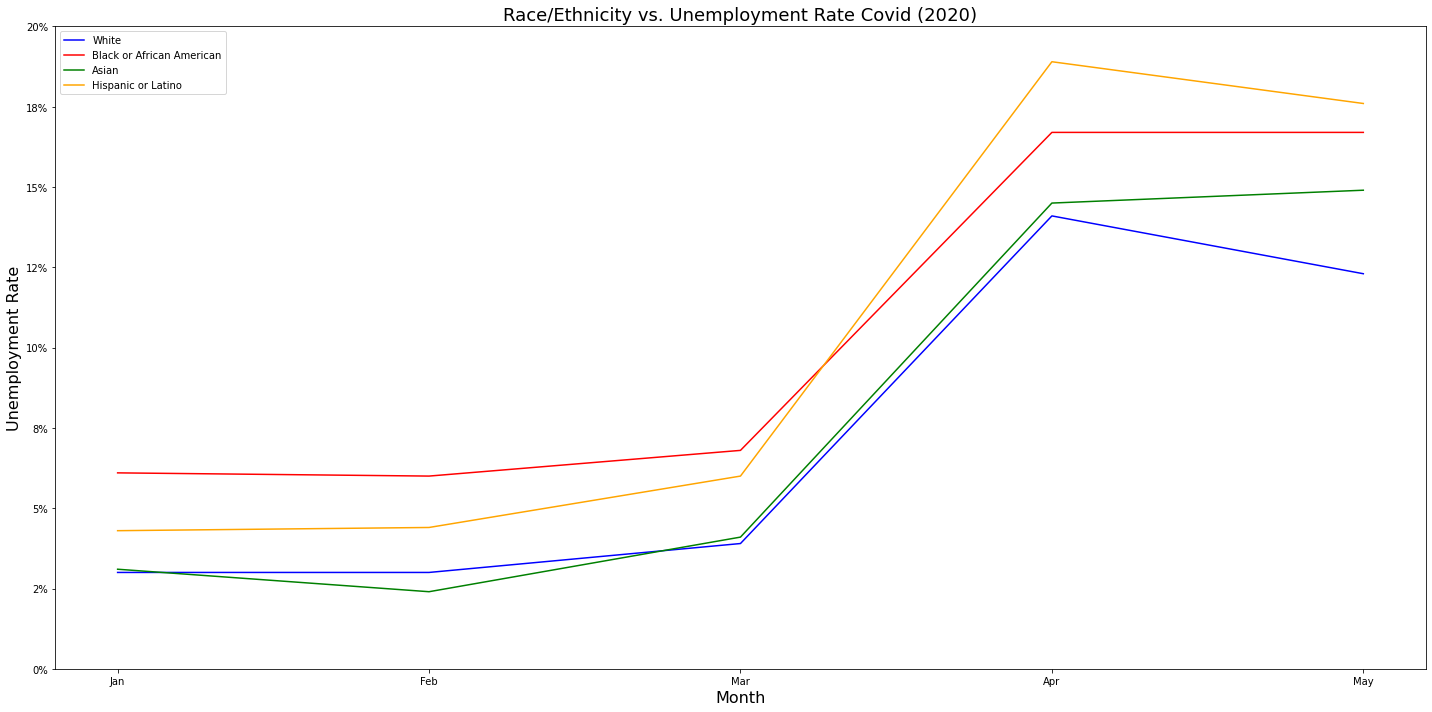

In [39]:
plt.figure(figsize=(20,10))
plt.plot( 'Month', 'White', data=covid_two, color='blue')
plt.plot( 'Month', 'Black or African American', data=covid_two, color='red')
plt.plot( 'Month', 'Asian', data=covid_two, color='green')
plt.plot( 'Month', 'Hispanic or Latino', data=covid_two, color='orange')
plt.legend(loc='best')
plt.title("Race/Ethnicity vs. Unemployment Rate Covid (2020)",fontsize=18)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,20,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Race vs Unemployment Rate_Covid")